In [1]:
%load_ext autoreload
%autoreload 2

import particle as pt
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplhep
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab
import time
from matplotlib.colors import LogNorm
mplhep.style.use(mplhep.style.ROOT)
from pprint import pprint
from tqdm import tqdm
import polars as pl
import sys
import os
import particle
# using getlogin() returning username
user_name = os.getlogin()

sys.path.append(f'/home/{user_name}/Documents/Atmos_Pandora/apc_atmo_repo/Anatree/')
from anatree_class import Anatree
from  ana_tools import *


plt.rcParams.update({'font.size': 16,
                     'grid.linestyle': '--',
                     'axes.grid': True,
                     'figure.autolayout': True,
                     'figure.figsize': [14,6]
                     })

anatree:Anatree

<Figure size 1400x600 with 0 Axes>

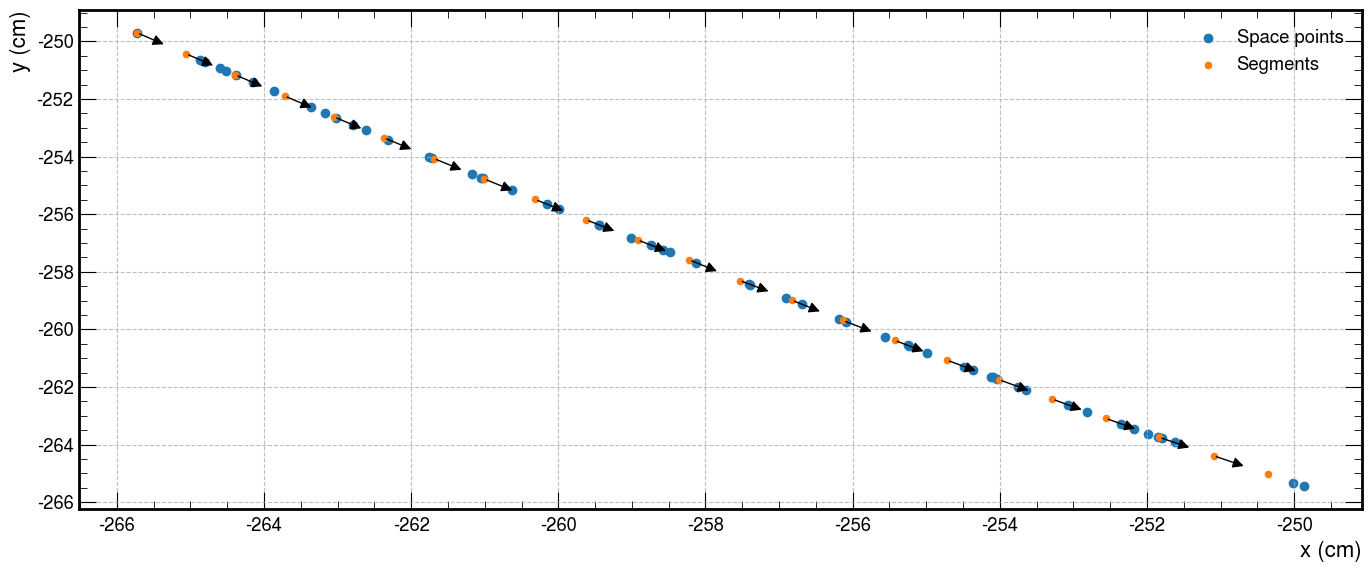

<Figure size 1400x600 with 0 Axes>

In [85]:
hits = pl.read_csv('/home/henrique/Documents/Atmos_Pandora/data/ereco_optimize/hits.dat', separator=';', new_columns=['x','y','z'])
seg = pl.read_csv('/home/henrique/Documents/Atmos_Pandora/data/ereco_optimize/seg.dat', separator=';', new_columns=['x','y','z'])
segn = pl.read_csv('/home/henrique/Documents/Atmos_Pandora/data/ereco_optimize/segn.dat', separator=';', new_columns=['x','y','z'])

def plot_planes(hits, seg, segn, c1='x', c2='y'):
    plt.scatter(hits[c1], hits[c2], label='Space points')
    plt.scatter(seg[c1], seg[c2], s=20, label='Segments')
    # plt.quiver(seg[c1][:-1], seg[c2][:-1], segn[c1], segn[c2], angles='xy', scale=2.5, units='xy', width=0.08, headwidth=2, headlength=5, headaxislength=5, label='Direction at segment')
    for p,_ in enumerate(seg[c1][:-1]):
        # plt.arrow(seg[c1][p], seg[c2][p], segn[c1][p]*0.5, segn[c2][p]*0.5, head_width=0.3, head_length=0.2, fc='k', ec='k')
        plt.annotate("", xy=(seg[c1][p]+segn[c1][p]*0.6, seg[c2][p]+segn[c2][p]*0.6), xytext=(seg[c1][p], seg[c2][p]),
                      arrowprops=dict(arrowstyle="-|>",facecolor='black', ))

plot_planes(hits,seg,segn, 'x','y')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.legend()
plt.figure()
# plot_planes(hits,seg,segn, 'z','x')



In [86]:


import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "browser"

data=[]

data.append(
    go.Scatter3d(x=hits['x'], y=hits['y'], z=hits['z'],
                    mode='markers',
                    marker={
                        'size':2
                    },
                    showlegend=True,
                    )
)
data.append(
    go.Scatter3d(x=seg['x'], y=seg['y'], z=seg['z'],
                    mode='markers',
                    marker={
                        'size':2
                    },
                    showlegend=True,
                    )
)

# for i, (x,y,z) in enumerate(zip(sx, sy, sz)):
#     data.append(
#         go.Scatter3d(x=x, y=y, z=z,
#                      mode='lines',
#                      line={
#                          'width': 15,
#                      },
#                      name=fr"$id: {i}, (shower)$",
#                      opacity= 0.5,
#                      showlegend=True,
#                      textfont={
#                          'size':20
#                      }
                     
#                      )
#     )
layout = go.Layout(
    width=1400,
    margin={'l': 1, 'r': 1, 'b': 1, 't': 1},
    legend=dict(title_font_family="Times New Roman",
                              font=dict(size= 18))
)
plot_figure = go.Figure(data=data, layout=layout)
plot_figure.show()